In [ ]:
"""
CMPS 2200  Recitation 1
"""

### the only imports needed are here
import tabulate
import time
###

def linear_search(mylist, key):
    """ done. """
    for i,v in enumerate(mylist):
        if v == key:
            return i
    return -1

def test_linear_search():
    """ done. """
    assert linear_search([1,2,3,4,5], 5) == 4
    assert linear_search([1,2,3,4,5], 1) == 0
    assert linear_search([1,2,3,4,5], 6) == -1

def binary_search(mylist, key):
    """ done. """
    return _binary_search(mylist, key, 0, len(mylist)-1)

def _binary_search(mylist, key, left, right):
    """
    Recursive implementation of binary search.

    Params:
      mylist....list to search
      key.......search key
      left......left index into list to search
      right.....right index into list to search

    Returns:
      index of key in mylist, or -1 if not present.
    """
    ### TODO
    if right < left:
        return -1

    mid = (right + left) // 2  # or: left + (right - left) // 2
    if mylist[mid] == key:
        return mid
    elif mylist[mid] > key:
        return _binary_search(mylist, key, left, mid - 1)
    else:
        return _binary_search(mylist, key, mid + 1, right)
    ###

def test_binary_search():
    assert binary_search([1,2,3,4,5], 5) == 4
    assert binary_search([1,2,3,4,5], 1) == 0
    assert binary_search([1,2,3,4,5], 6) == -1
    ### TODO: add two more tests here.
    assert binary_search([1,2,3,4,5], 2) == 1
    assert binary_search([], 2) == -1
    ###


def time_search(search_fn, mylist, key):
    """
    Return the number of milliseconds to run this
    search function on this list.

    Note 1: `search_fn` parameter is a function.
    Note 2: time.time() returns the current time in seconds.
    You'll have to multiple by 1000 to get milliseconds.

    Params:
      sort_fn.....the search function
      mylist......the list to search
      key.........the search key

    Returns:
      the number of milliseconds it takes to run this
      search function on this input.
    """
    ### TODO
    start = time.time()
    search_fn(mylist, key)
    return (time.time() - start) * 1000
    ###

def compare_search(sizes=[1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]):
    """
    Compare the running time of linear_search and binary_search
    for input sizes as given. The key for each search should be
    -1. The list to search for each size contains the numbers from 0 to n-1,
    sorted in ascending order.

    You'll use the time_search function to time each call.

    Returns:
      A list of tuples of the form
      (n, linear_search_time, binary_search_time)
      indicating the number of milliseconds it takes
      for each method to run on each value of n
    """
    ### TODO
    result = []
    for size in sizes:
        mylist = list(range(int(size)))
        result.append([
            len(mylist),
            time_search(linear_search, mylist, -1),
            time_search(binary_search, mylist, -1)
        ])
    return result
    ###

def print_results(results):
    """ done """
    print(tabulate.tabulate(results,
                            headers=['n', 'linear', 'binary'],
                            floatfmt=".3f",
                            tablefmt="github"))

def test_print():
    print_results(compare_search())

def test_compare_search():
    res = compare_search(sizes=[10, 100])
    assert res[0][0] == 10
    assert res[1][0] == 100
    assert res[0][1] < 1
    assert res[1][1] < 1


In [ ]:
# if tests pass, no output.
test_linear_search()
test_binary_search()
test_compare_search()

In [ ]:
results = compare_search()
print_results(results)

|        n |   linear |   binary |
|----------|----------|----------|
|       10 |    0.002 |    0.004 |
|      100 |    0.004 |    0.002 |
|     1000 |    0.040 |    0.003 |
|    10000 |    0.415 |    0.007 |
|   100000 |    5.096 |    0.016 |
|  1000000 |   46.012 |    0.018 |
| 10000000 |  466.964 |    0.025 |


$ T_{\hbox{binary_search}}(n) \stackrel{?}{=} \beta \: \hbox{lg} n + \beta_0$  
$ T_{\hbox{linear_search}}(n) \stackrel{?}{=} \beta \: n + \beta_0$

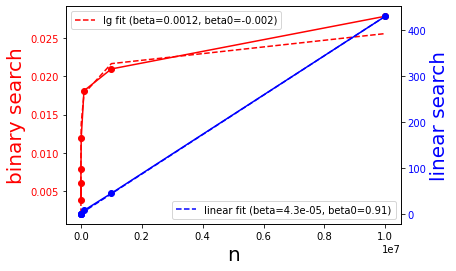

In [ ]:
# plot raw timing data and best fit curves.

import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import curve_fit
import numpy as np

sizes = [x[0] for x in results]
linear_times = [x[1] for x in results]
binary_times = [x[2] for x in results]
fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax2.plot(
         sizes,
         linear_times,
         'bo-'
       )
ax2.set_ylabel('linear search', color='blue', size=20)
ax2.tick_params(axis='y', labelcolor='blue')
ax.plot(
         sizes,
         binary_times,
         'ro-'
        )
ax.set_ylabel('binary search', color='red', size=20)
ax.tick_params(axis='y', labelcolor='red')
ax.set_xlabel('n', size=20)

def lgn(i, beta, beta0):
    # beta*lg(n) + beta0
    return beta*np.array([math.log(x, 2) for x in i] ) + beta0

def linearn(i, beta, beta0):
    # beta*n + beta0
    return beta*np.array(i) + beta0

lgn_beta, _ = curve_fit(lgn, sizes, binary_times)
ax.plot(sizes, lgn(sizes, *lgn_beta), 'r--', label='lg fit (beta=%.2g, beta0=%.2g)' % (lgn_beta[0], lgn_beta[1]))
ax.legend(loc='upper left')

linearn_beta, _ = curve_fit(linearn, sizes, linear_times)
ax2.plot(sizes, linearn(sizes, *linearn_beta), 'b--', label='linear fit (beta=%.2g, beta0=%.2g)' % (linearn_beta[0], linearn_beta[1]))
ax2.legend(loc='lower right')
plt.show()

<br><br>

T(Sort + Binary Search) $\stackrel{?}{<}$ T(Linear Search)  

<br><br><br><br>

$ n^2 + k* \mathrm{lg}n \stackrel{?}{<} k * n$

<br><br><br><br><br><br><br><br><br><br><br><br>

if $k=n$

$ n^2 + n \mathrm{lg}n > n^2$ $\Rightarrow$ Linear Search is faster


<br><br><br><br><br><br><br><br><br><br><br><br>

if $k=n^2$

$ n^2 + n^2 \mathrm{lg}n < n^3$ $\Rightarrow$ Sort + Binary Search is faster


<br><br><br><br><br><br><br><br><br><br><br><br>

if $k=n \mathrm{lg}n$

$ n^2 + n \mathrm{lg}^2 n < n^2 \mathrm{lg}n$ $\Rightarrow$ Sort + Binary Search is faster

<br><br><br><br><br><br><br><br><br><br><br><br>

or, solve for $k$

$ n^2 + k* \mathrm{lg}n \stackrel{?}{<} k * n$  
$n^2 = k*n - k * \mathrm{lg}n$  
$n^2 = k(n- \mathrm{lg}n)$  
$\frac{n^2}{n- \mathrm{lg}n} = k$

<br><br>
So, Sort + Binary Search is faster when $ k > \frac{n^2}{n- \mathrm{lg}n} $